## Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,VotingRegressor
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## Data

In [ ]:
df = pd.read_csv('/content/laptops.csv', error_bad_lines=False, engine='python')
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rp
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,21932172.17
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,14716618.66
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,9413371.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,41540796.95
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,29526879.89


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  Price_rp          1303 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 142.6+ KB


In [ ]:
df["Ram"] = pd.to_numeric(df["Ram"], errors='coerce').fillna(0, downcast='infer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  Price_rp          1303 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 142.6+ KB


In [ ]:
df["Cpu"] = pd.to_numeric(df["Cpu"], errors='coerce').fillna(0, downcast='infer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   int64  
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  Price_rp          1303 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 142.6+ KB


In [ ]:
df["Memory"] = pd.to_numeric(df["Memory"], errors='coerce').fillna(0, downcast='infer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   int64  
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   int64  
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  Price_rp          1303 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 142.6+ KB


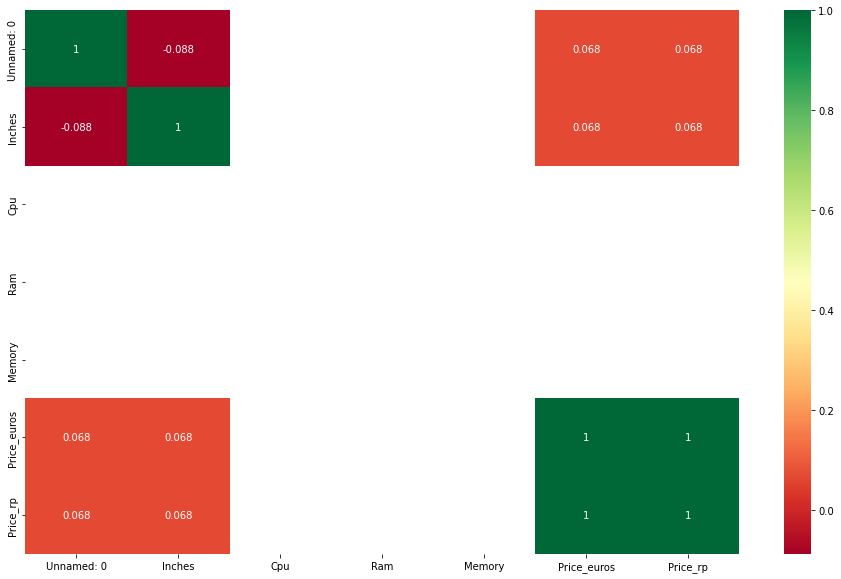

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

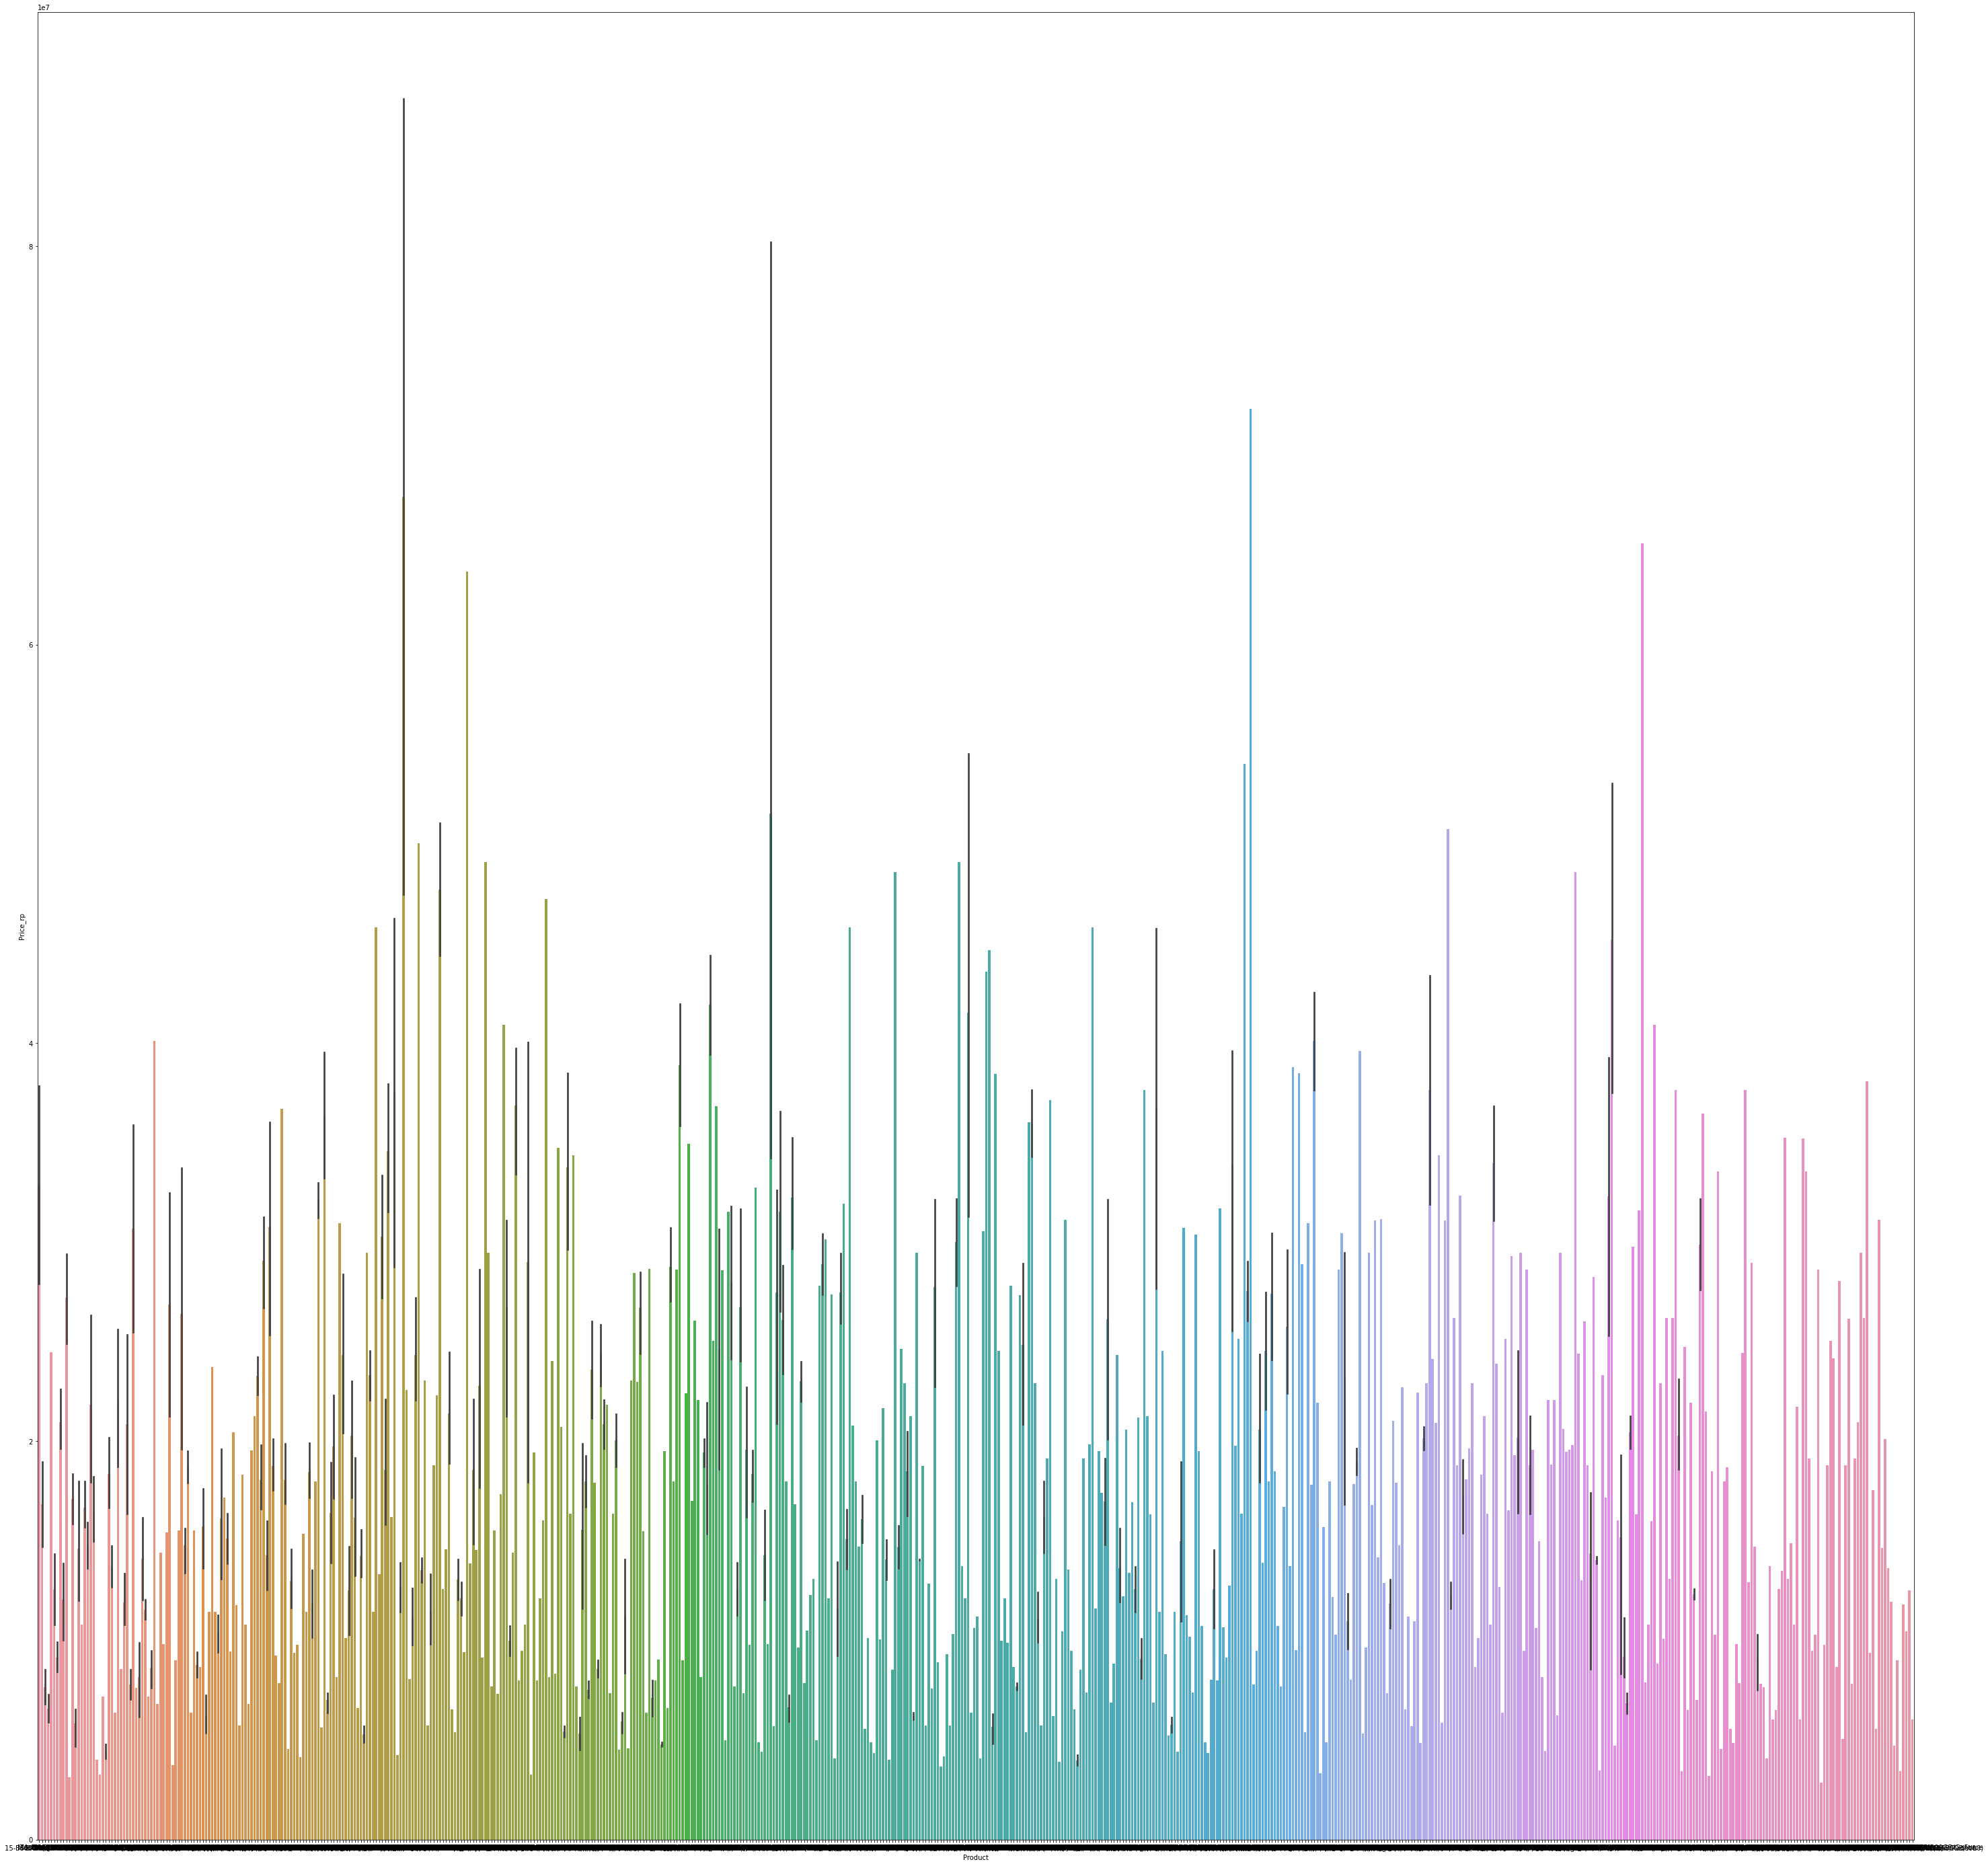

In [ ]:
plt.subplots(figsize=(50,50))
sns.barplot(x='Product',y='Price_rp',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


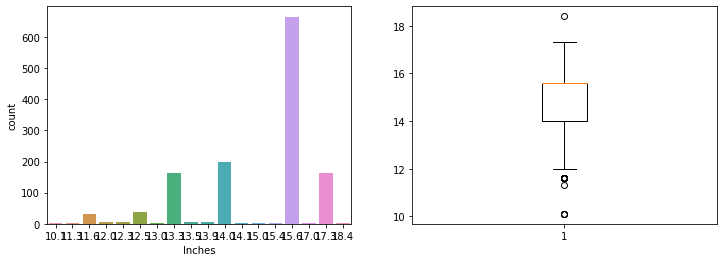

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Inches'])
f.add_subplot(1,2,2)
plt.boxplot(df['Inches'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


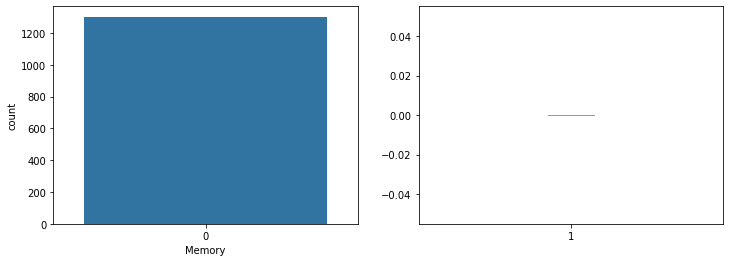

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Memory'])
f.add_subplot(1,2,2)
plt.boxplot(df['Memory'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


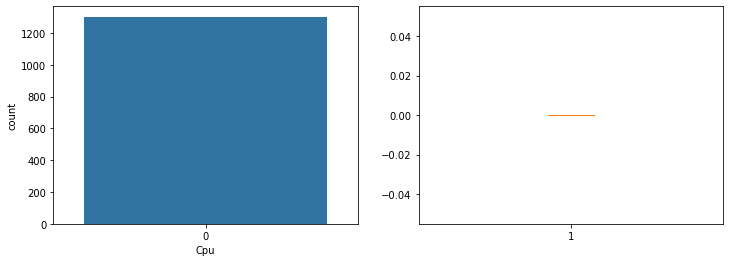

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Cpu'])
f.add_subplot(1,2,2)
plt.boxplot(df['Cpu'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


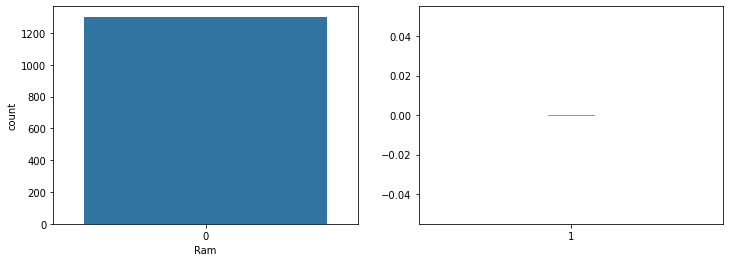

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Ram'])
f.add_subplot(1,2,2)
plt.boxplot(df['Ram'])
plt.show()

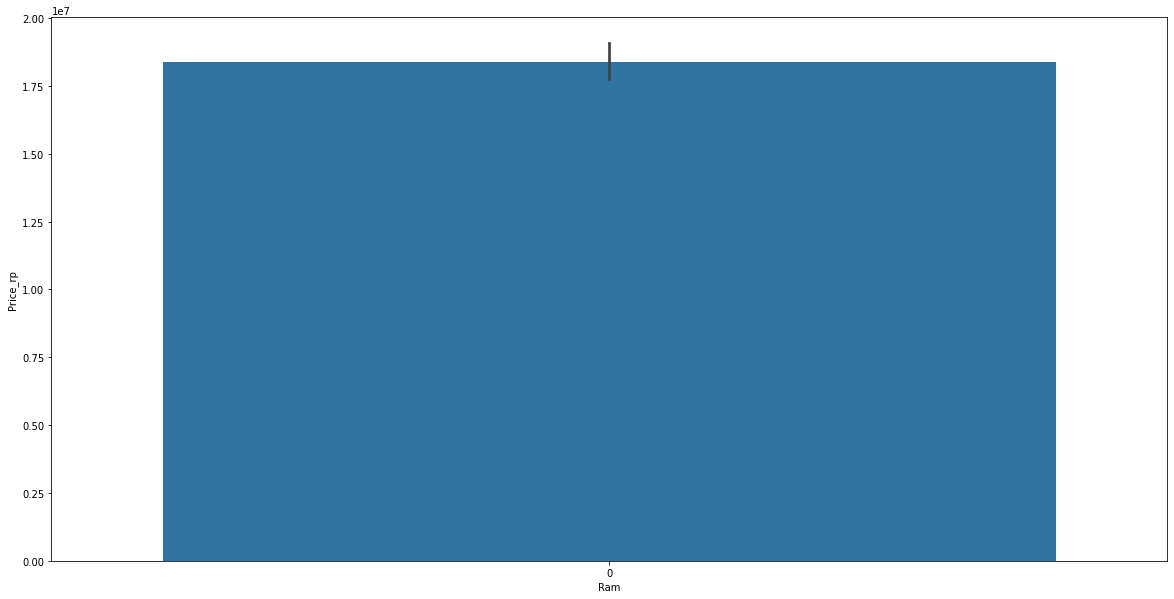

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Ram',y='Price_rp',data=df)

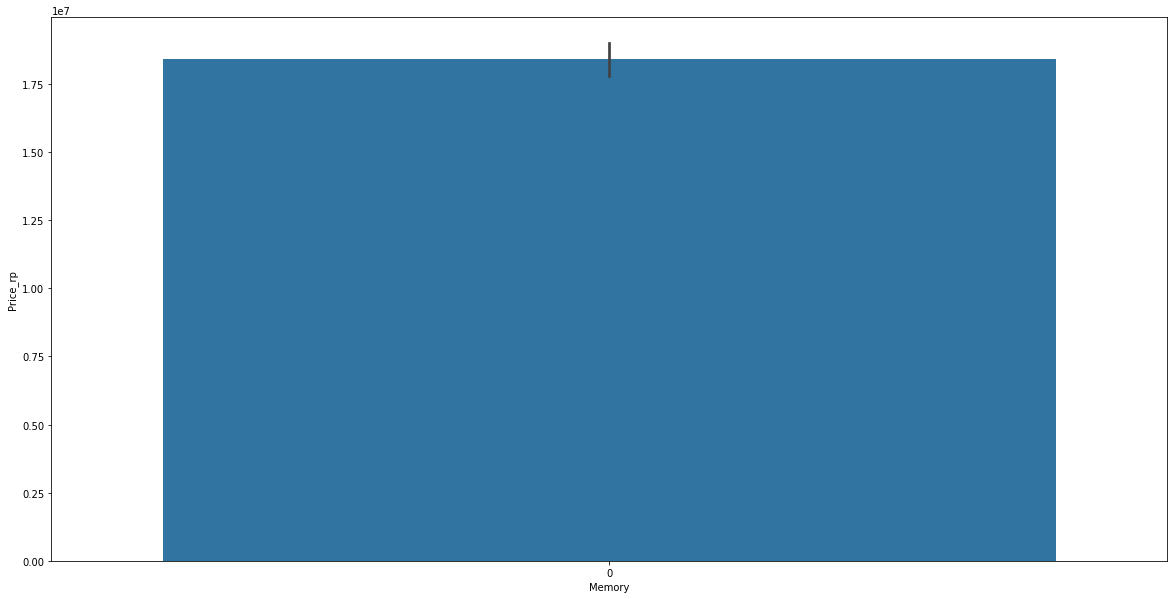

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Memory',y='Price_rp',data=df)

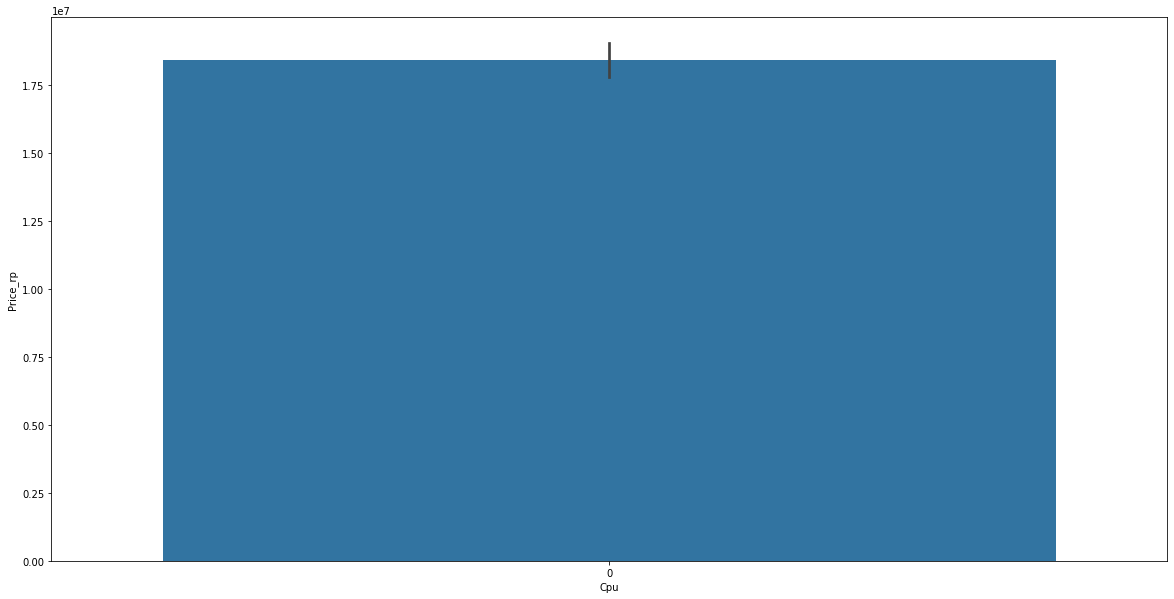

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Cpu',y='Price_rp',data=df)

In [ ]:
le={}
for col in set(df.columns).difference({'Price_euros'}):
le[col] = LabelEncoder()
df[col]  = le[col].fit_transform(df[col])
df

IndentationError: ignored

## Cleaning data

In [ ]:
df.isna().sum()

Unnamed: 0             0
Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
Cpu                    0
Ram                    0
Memory                 0
Gpu                    0
OpSys                  0
Weight                 0
Price_euros            0
Price_rp               0
TouchScreen         1111
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.loc[df['ScreenResolution'].str.contains('Touchscreen'),
'TouchScreen']="Yes"
df.tail(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rp,TouchScreen
1293,1311,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00,1.471760e+07,NaN
1294,1312,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99,9.003930e+06,NaN
1295,1313,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99,1.319493e+07,NaN
1296,1314,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00,3.421556e+06,NaN
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32,1.179242e+07,NaN
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1.044475e+07,Yes
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,2.454025e+07,Yes
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,3.748977e+06,NaN
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1.250751e+07,NaN
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00,6.040929e+06,NaN


## COBAAAA

In [ ]:
#IMPORT LIB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#READ DATA
df=pd.read_csv('/content/laptops.csv',encoding='ISO-8859–1')
df

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rp
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,21932172.17
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,14716618.66
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,9413371.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,41540796.95
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,29526879.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,10444749.04
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,24540248.92
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,3748977.32
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,12507505.12


In [ ]:
df.isnull().sum() 

In [ ]:
df.loc[df['ScreenResolution'].str.contains('Touchscreen'),
'TouchScreen']="Yes"
df.tail(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rp,TouchScreen
1293,1311,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00,1.471760e+07,NaN
1294,1312,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99,9.003930e+06,NaN
1295,1313,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99,1.319493e+07,NaN
1296,1314,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00,3.421556e+06,NaN
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32,1.179242e+07,NaN
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1.044475e+07,Yes
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,2.454025e+07,Yes
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,3.748977e+06,NaN
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1.250751e+07,NaN
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00,6.040929e+06,NaN


In [ ]:
df['ScreenResolution']=df['ScreenResolution'].str.extract('(\d\d\d\d?x\d\d\d\d?)',expand=True)
df.tail(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rp,TouchScreen,HDD
1293,1311,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00,1.471760e+07,NaN,1000
1294,1312,HP,Pavilion 15-AW003nv,Notebook,15.6,1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99,9.003930e+06,NaN,0
1295,1313,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99,1.319493e+07,NaN,1000
1296,1314,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00,3.421556e+06,NaN,0
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32,1.179242e+07,NaN,500
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1.044475e+07,Yes,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,2.454025e+07,Yes,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,3.748977e+06,NaN,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1.250751e+07,NaN,1000
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00,6.040929e+06,NaN,500


In [ ]:
df['HDD']=df['Memory'].str.extract('(\d\d\d?GB\sHDD|\dTB\sHDD|\d\.0TB\sHDD)',expand=True)
df['HDD']=df['HDD'].str.extract('(\d\d\d?|\dTB|\d\.0TB)',expand=True)
df['HDD']=df['HDD'].str.replace('(TB|\.0TB)','000',regex=True)
df['HDD'].fillna(0,inplace=True)
df.head(30)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rp,TouchScreen,HDD
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.193217e+07,NaN,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.471662e+07,NaN,0
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,9.413371e+06,NaN,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,4.154080e+07,NaN,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2.952688e+07,NaN,0
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00,6.548432e+06,NaN,500
6,7,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,3.503362e+07,NaN,0
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70,1.896917e+07,NaN,0
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,2.447476e+07,NaN,0
9,10,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,1.260573e+07,NaN,0


## :)

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/laptops.csv', engine='python')
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rp
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,21932172.17
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,14716618.66
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,9413371.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,41540796.95
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,29526879.89


In [ ]:
df.shape

(1303, 14)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
Price_rp            0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0', 'Price_euros'],inplace=True)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rp
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,21932172.17
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,14716618.66
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,9413371.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,41540796.95
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,29526879.89


In [ ]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rp
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,21932172.17
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,14716618.66
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,9413371.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,41540796.95
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,29526879.89


In [ ]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

## Analisis data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


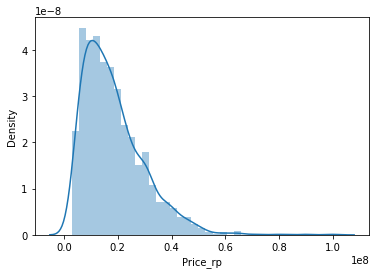

In [ ]:
sns.distplot(df['Price_rp'])

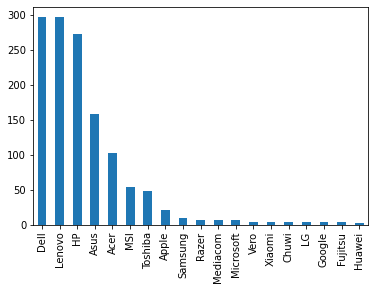

In [ ]:
df['Company'].value_counts().plot(kind='bar')

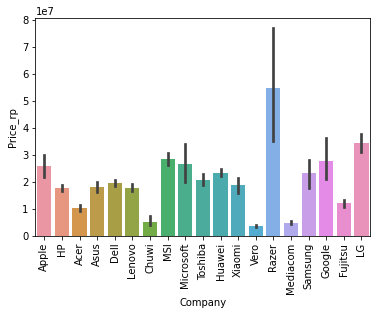

In [ ]:
sns.barplot(x=df['Company'],y=df['Price_rp'])
plt.xticks(rotation='vertical')
plt.show()

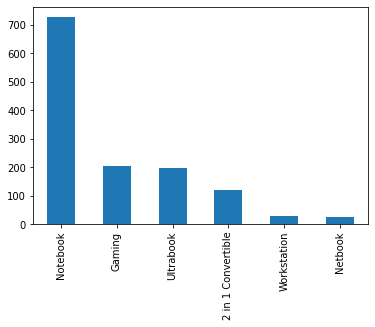

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

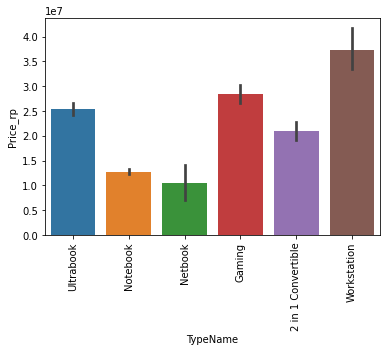

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price_rp'])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


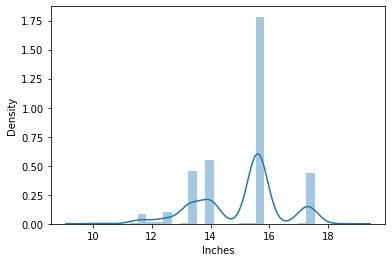

In [ ]:
sns.distplot(df['Inches'])

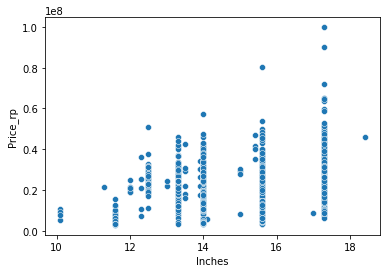

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price_rp'])

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440               

In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rp,Touchscreen
320,HP,Elitebook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,21151435.36,0
758,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,46968464.81,0
175,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,7514325.72,0
62,Lenovo,IdeaPad 520S-14IKB,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.70,9806276.92,0
984,Toshiba,Tecra A40-C-1KF,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.75,14979538.20,0


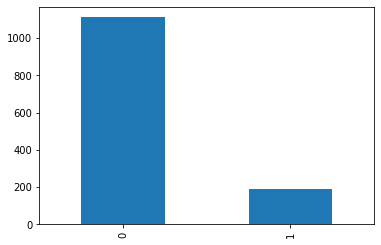

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')

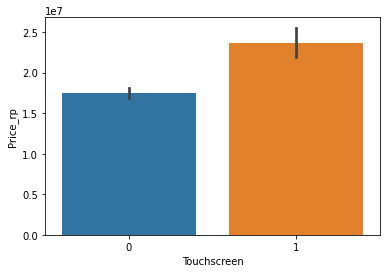

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price_rp'])

In [ ]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rp,Touchscreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,21932172.17,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,14716618.66,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,9413371.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,41540796.95,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,29526879.89,0,1


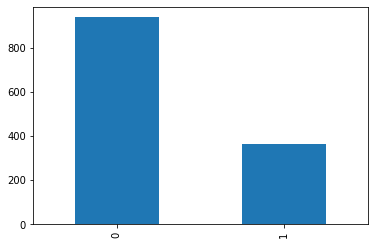

In [ ]:
df['IPS'].value_counts().plot(kind='bar')

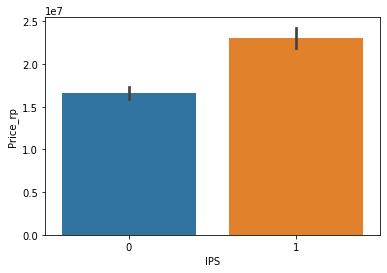

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price_rp'])

In [ ]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [ ]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rp,Touchscreen,IPS,X_res,Y_res
874,Samsung,Notebook 9,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.23,3.027013e+07,0,0,Full HD 1920,1080
637,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.42,4.076399e+06,0,0,1366,768
1254,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,7.268596e+06,0,0,1366,768
786,MSI,GL62M (i5-7300HQ/8GB/1TB,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,1.782811e+07,0,0,Full HD 1920,1080
1196,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,No OS,1.90,6.024557e+06,0,0,1366,768


In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rp,Touchscreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,21932172.17,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,14716618.66,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,9413371.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,41540796.95,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,29526879.89,0,1,2560,1600


In [ ]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [ ]:
df.info()

In [ ]:
df.corr()['Price_rp']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_rp       1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_rp, dtype: float64

In [ ]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
df.corr()['Price_rp']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_rp       1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price_rp, dtype: float64

In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
AMD E-Series E2-9000 2.2GHz               1
Intel Core i7 7700HQ 2.7GHz               1
Intel Celeron Quad Core N3710 1.6GHz      1
Intel Core i7 2.7GHz                      1
Intel Core i7 7500U 2.5GHz                1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rp,Touchscreen,IPS,X_res,Y_res,ppi,Cpu Name
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,21932172.17,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,14716618.66,0,0,1440,900,127.677940,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,9413371.00,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,41540796.95,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,29526879.89,0,1,2560,1600,226.983005,Intel Core i5


In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rp,Touchscreen,IPS,X_res,Y_res,ppi,Cpu Name,Cpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,21932172.17,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,14716618.66,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,9413371.00,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,41540796.95,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,29526879.89,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5


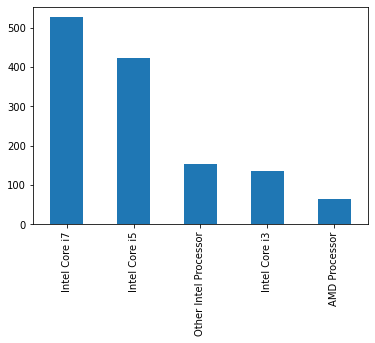

In [ ]:
df['Cpu brand'].value_counts().plot(kind='bar')

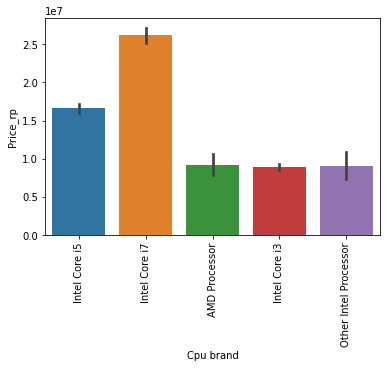

In [ ]:
sns.barplot(x=df['Cpu brand'],y=df['Price_rp'])
plt.xticks(rotation='vertical')
plt.show()

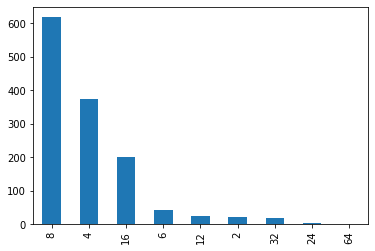

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

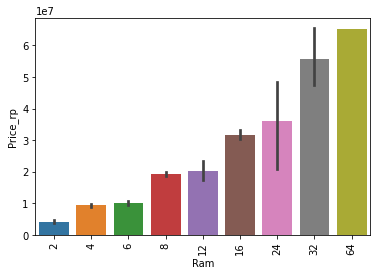

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price_rp'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
508GB Hybrid                       1
5

In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [ ]:
df.sample(5)

In [ ]:
df.corr()['Price_rp']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price_rp         1.000000
Touchscreen      0.191226
IPS              0.252208
X_res            0.556529
Y_res            0.552809
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_rp, dtype: float64

In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon Pro 560           1
AMD Radeon R9 M385           1
Nvidia GeForce GTX1060       1
AMD FirePro W6150M           1
Nvidia GeForce GTX1080       1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rp,Touchscreen,IPS,X_res,Y_res,ppi,Cpu Name,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,21932172.17,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,14716618.66,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,9413371.00,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,41540796.95,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,29526879.89,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel


In [ ]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [ ]:
df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

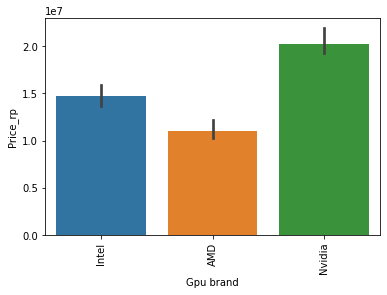

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price_rp'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

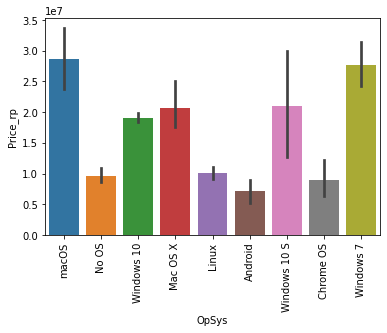

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price_rp'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

In [ ]:
df.drop(columns=['OpSys', 'Gpu', 'Hybrid','Flash_Storage', 'Memory', 'Cpu','Cpu Name',
                 'ScreenResolution', 'Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,Product,TypeName,Ram,Weight,Price_rp,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,8,1.37,21932172.17,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,14716618.66,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,1.86,9413371.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,1.83,41540796.95,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,1.37,29526879.89,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


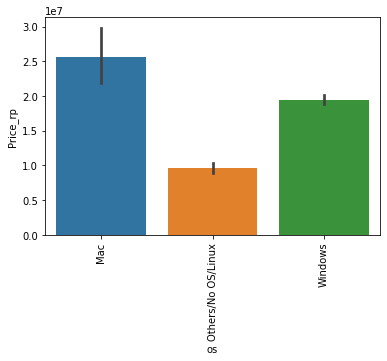

In [ ]:
sns.barplot(x=df['os'],y=df['Price_rp'])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


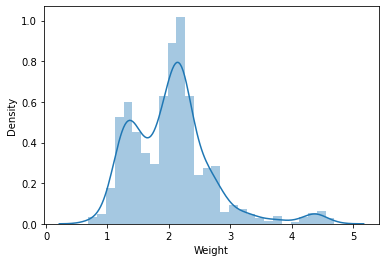

In [ ]:
sns.distplot(df['Weight'])

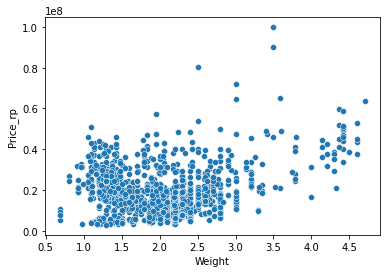

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price_rp'])

In [ ]:
df.corr()['Price_rp']

Ram            0.742905
Weight         0.209867
Price_rp       1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price_rp, dtype: float64

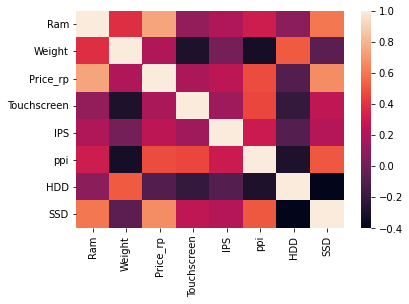

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


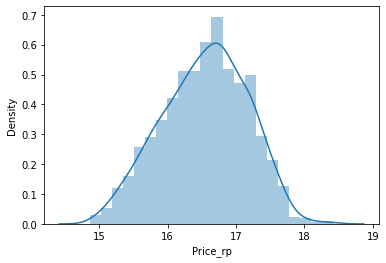

In [ ]:
sns.distplot(np.log(df['Price_rp']))

In [ ]:
#ONE-HOT ENCODING
pd.DataFrame(df['TypeName'])

,TypeName
0,Ultrabook
1,Ultrabook
2,Notebook
3,Ultrabook
4,Ultrabook
...,...
1298,2 in 1 Convertible
1299,2 in 1 Convertible
1300,Notebook
1301,Notebook


In [ ]:
dummTypeName = pd.get_dummies(df['TypeName'])
dummTypeName

,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1298,1,0,0,0,0,0
1299,1,0,0,0,0,0
1300,0,0,0,1,0,0
1301,0,0,0,1,0,0


In [ ]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [ ]:
df['Notebook'] = df['TypeName'].apply(lambda x:1 if 'Notebook' in x else 0)
df['Gaming'] = df['TypeName'].apply(lambda x:1 if 'Gaming' in x else 0)
df['Ultrabook'] = df['TypeName'].apply(lambda x:1 if 'Ultrabook' in x else 0)
df['2 in 1 Convertible'] = df['TypeName'].apply(lambda x:1 if '2 in 1 Convertible' in x else 0)
df['Workstation'] = df['TypeName'].apply(lambda x:1 if 'Workstation' in x else 0)
df['Netbook'] = df['TypeName'].apply(lambda x:1 if 'Netbook ' in x else 0)
df.sample(2)

,Company,Product,TypeName,Ram,Weight,Price_rp,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Notebook,Gaming,Ultrabook,2 in 1 Convertible,Workstation,Netbook
263,Dell,Vostro 3568,Notebook,4,2.18,10755799.56,0,0,141.211998,Intel Core i5,1000,0,Intel,Windows,1,0,0,0,0,0
1162,HP,Pavilion 15-cb003nv,Gaming,8,2.62,14717600.92,0,1,141.211998,Intel Core i7,1000,0,Nvidia,Windows,0,1,0,0,0,0


In [ ]:
df.drop(columns=['Company', 'TypeName'],inplace=True)
df.head()

,Product,Ram,Weight,Price_rp,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Notebook,Gaming,Ultrabook,2 in 1 Convertible,Workstation,Netbook,Dell,Lenovo,HP,Asus,Acer,MSI,Toshiba,Apple,Samsung,Razer,Mediacom,Microsoft,Vero,Xiaomi,Chuwi,LG,Google,Fujitsu,Huawei
0,MacBook Pro,8,1.37,21932172.17,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Macbook Air,8,1.34,14716618.66,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,250 G6,8,1.86,9413371.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MacBook Pro,16,1.83,41540796.95,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,MacBook Pro,8,1.37,29526879.89,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#ONE-HOT ENCODING
pd.DataFrame(df['Company'])

,Company
0,Apple
1,Apple
2,HP
3,Apple
4,Apple
...,...
1298,Lenovo
1299,Lenovo
1300,Lenovo
1301,HP


In [ ]:
dummTypeName = pd.get_dummies(df['Company'])
dummTypeName

,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1299,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1300,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1301,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Fujitsu        3
Huawei         2
Name: Company, dtype: int64

In [ ]:
df['Dell'] = df['Company'].apply(lambda x:1 if 'Dell' in x else 0)
df['Lenovo'] = df['Company'].apply(lambda x:1 if 'Lenovo' in x else 0)
df['HP'] = df['Company'].apply(lambda x:1 if 'HP' in x else 0)
df['Asus'] = df['Company'].apply(lambda x:1 if 'Asus' in x else 0)
df['Acer'] = df['Company'].apply(lambda x:1 if 'Acer' in x else 0)
df['MSI'] = df['Company'].apply(lambda x:1 if 'MSI' in x else 0)

df['Toshiba'] = df['Company'].apply(lambda x:1 if 'Toshiba' in x else 0)
df['Apple'] = df['Company'].apply(lambda x:1 if 'Apple' in x else 0)
df['Samsung'] = df['Company'].apply(lambda x:1 if 'Samsung' in x else 0)
df['Razer'] = df['Company'].apply(lambda x:1 if 'Razer' in x else 0)
df['Mediacom'] = df['Company'].apply(lambda x:1 if 'Mediacom' in x else 0)
df['Microsoft'] = df['Company'].apply(lambda x:1 if 'Microsoft' in x else 0)

df['Vero'] = df['Company'].apply(lambda x:1 if 'Vero' in x else 0)
df['Xiaomi'] = df['Company'].apply(lambda x:1 if 'Xiaomi' in x else 0)
df['Chuwi'] = df['Company'].apply(lambda x:1 if 'Chuwi' in x else 0)
df['LG'] = df['Company'].apply(lambda x:1 if 'LG' in x else 0)
df['Google'] = df['Company'].apply(lambda x:1 if 'Google' in x else 0)
df['Fujitsu'] = df['Company'].apply(lambda x:1 if 'Fujitsu' in x else 0)
df['Huawei'] = df['Company'].apply(lambda x:1 if 'Huawei' in x else 0)
df.sample(2)

,Company,Product,TypeName,Ram,Weight,Price_rp,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Notebook,Gaming,Ultrabook,2 in 1 Convertible,Workstation,Netbook,Dell,Lenovo,HP,Asus,Acer,MSI,Toshiba,Apple,Samsung,Razer,Mediacom,Microsoft,Vero,Xiaomi,Chuwi,LG,Google,Fujitsu,Huawei
243,Dell,Inspiron 5577,Gaming,8,2.56,14390179.32,0,0,141.211998,Intel Core i5,0,256,Nvidia,Windows,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1160,Lenovo,ThinkPad T460,Ultrabook,8,1.70,24540248.92,0,0,157.350512,Intel Core i7,0,256,Intel,Windows,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Product,Ram,Weight,Price_rp,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Notebook,Gaming,Ultrabook,2 in 1 Convertible,Workstation,Netbook,Dell,Lenovo,HP,Asus,Acer,MSI,Toshiba,Apple,Samsung,Razer,Mediacom,Microsoft,Vero,Xiaomi,Chuwi,LG,Google,Fujitsu,Huawei
0,MacBook Pro,8,1.37,21932172.17,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Macbook Air,8,1.34,14716618.66,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,250 G6,8,1.86,9413371.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MacBook Pro,16,1.83,41540796.95,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,MacBook Pro,8,1.37,29526879.89,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(columns=['Price_rp'])
y = np.log(df['Price_rp'])

In [ ]:
X

,Product,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Notebook,Gaming,Ultrabook,2 in 1 Convertible,Workstation,Netbook,Dell,Lenovo,HP,Asus,Acer,MSI,Toshiba,Apple,Samsung,Razer,Mediacom,Microsoft,Vero,Xiaomi,Chuwi,LG,Google,Fujitsu,Huawei
0,MacBook Pro,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Macbook Air,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,250 G6,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MacBook Pro,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,MacBook Pro,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Yoga 500-14ISK,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1299,Yoga 900-13ISK,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1300,IdeaPad 100S-14IBR,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1301,15-AC110nv (i7-6500U/6GB/1TB/Radeon,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0       16.903465
1       16.504488
2       16.057642
3       17.542187
4       17.200812
          ...    
1298    16.161610
1299    17.015825
1300    15.136994
1301    16.341839
1302    15.614068
Name: Price_rp, Length: 1302, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

,Product,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Notebook,Gaming,Ultrabook,2 in 1 Convertible,Workstation,Netbook,Dell,Lenovo,HP,Asus,Acer,MSI,Toshiba,Apple,Samsung,Razer,Mediacom,Microsoft,Vero,Xiaomi,Chuwi,LG,Google,Fujitsu,Huawei
1189,Predator G9-793,16,4.200,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1185,Rog GL552VW-DM201T,8,2.591,0,1,141.211998,Intel Core i7,1000,256,Nvidia,Windows,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
568,IdeaPad 320-15IAP,4,2.200,0,0,141.211998,Other Intel Processor,500,0,Intel,Windows,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1251,255 G6,4,1.860,0,0,100.454670,AMD Processor,500,0,AMD,Windows,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491,Portege X30-D-10L,32,1.050,1,0,165.632118,Intel Core i7,0,512,Intel,Windows,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Zenbook UX330UA-AH5Q,8,1.200,0,1,276.053530,Intel Core i5,0,256,Intel,Windows,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
835,Alienware 15,16,3.210,0,0,141.211998,Intel Core i7,1000,256,Nvidia,Windows,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1217,IdeaPad 320-17IKB,8,2.800,0,0,106.113062,Intel Core i5,1000,0,Intel,Others/No OS/Linux,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
559,Vostro 3568,4,2.180,0,0,100.454670,Intel Core i3,1000,0,AMD,Windows,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

ValueError: ignored

## Modelling

In [ ]:
X = df.drop(columns=['Company', 'Price_rp', 'Product', 'TypeName', 'Cpu brand', ])
y = np.log(df['Price_rp'])

In [ ]:
X = df.drop(columns=['Company', 'Price_rp', 'Product', 'TypeName', 'Cpu brand', ])
y = np.log(df['Price_rp'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
df.head()

,Company,Product,TypeName,Ram,Weight,Price_rp,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,8,1.37,21932172.17,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,14716618.66,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,1.86,9413371.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,1.83,41540796.95,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,1.37,29526879.89,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
X

,Ram,Weight,Touchscreen,IPS,ppi,HDD,SSD,Gpu brand
0,8,1.37,0,1,226.983005,0,128,Intel
1,8,1.34,0,0,127.677940,0,0,Intel
2,8,1.86,0,0,141.211998,0,256,Intel
3,16,1.83,0,1,220.534624,0,512,AMD
4,8,1.37,0,1,226.983005,0,256,Intel
...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,Intel
1299,16,1.30,1,1,276.053530,0,512,Intel
1300,2,1.50,0,0,111.935204,0,0,Intel
1301,6,2.19,0,0,100.454670,1000,0,AMD


In [ ]:
lin_reg.fit(X_train, y_train)

ValueError: ignored

In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

## Linear Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

ValueError: ignored